In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

# CSV 파일 불러오기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Project/Anaconda/boston.csv", index_col=0)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
# 'PRICE' 열의 값이 5를 넘는 행만 출력
filtered_df = df[df['PRICE'] > 5]
filtered_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


In [85]:
'''
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 주택 1가구당 평균 방의 수 |
| AveBedrms | 주택 1가구당 평균 침실의 수 |
| Population | 인구 |
| AveOccup |  average house occupancy 평균 주택점유율 |
| Latitude | 위도 |
| Longitude | 경도 |
'''

'\n| MedInc | 블록의 중간 소득 |\n| HouseAge | 블록의 중간 주택 연도 |\n| AveRooms | 주택 1가구당 평균 방의 수 |\n| AveBedrms | 주택 1가구당 평균 침실의 수 |\n| Population | 인구 |\n| AveOccup |  average house occupancy 평균 주택점유율 |\n| Latitude | 위도 |\n| Longitude | 경도 |\n'

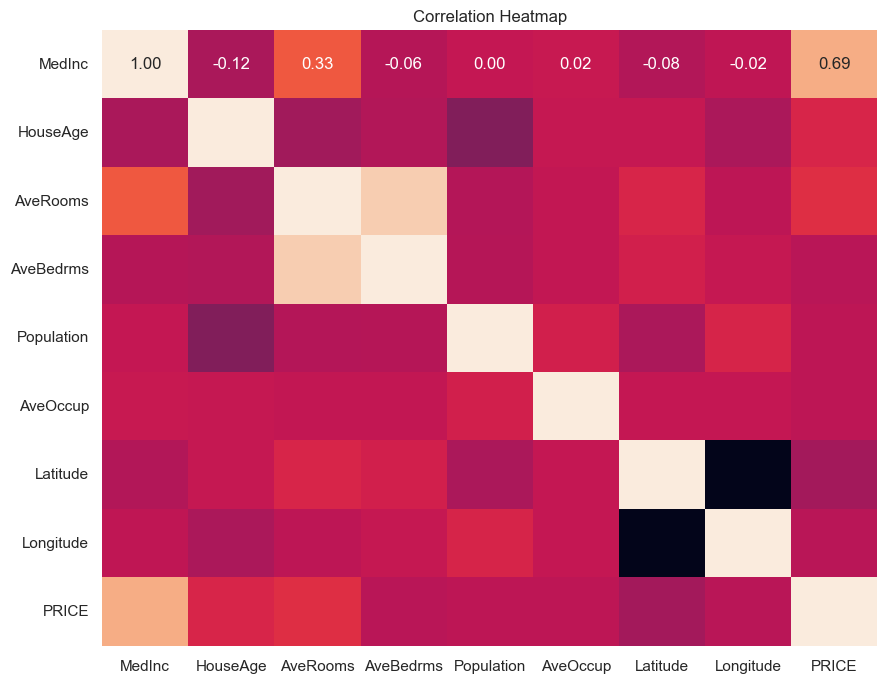

In [18]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cbar=False, fmt=".2f")  # 숫자 크기를 조정
plt.title('Correlation Heatmap')
plt.show()

# PRICE와 높은 건  MedInc

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
X = df.drop(['HouseAge', 'AveBedrms', 'Longitude','PRICE'], axis=1)

X

,MedInc,AveRooms,Population,AveOccup,Latitude
0,8.3252,6.984127,322.0,2.555556,37.88
1,8.3014,6.238137,2401.0,2.109842,37.86
2,7.2574,8.288136,496.0,2.802260,37.85
3,5.6431,5.817352,558.0,2.547945,37.85
4,3.8462,6.281853,565.0,2.181467,37.85
...,...,...,...,...,...
20635,1.5603,5.045455,845.0,2.560606,39.48
20636,2.5568,6.114035,356.0,3.122807,39.49
20637,1.7000,5.205543,1007.0,2.325635,39.43
20638,1.8672,5.329513,741.0,2.123209,39.43


In [68]:
y = df['AveRooms']
y.head()

0    6.984127
1    6.238137
2    8.288136
3    5.817352
4    6.281853
Name: AveRooms, dtype: float64

In [35]:
y = df['PRICE']
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 5) (16512,)
(4128, 5) (4128,)


#### LinearRegression으로 예측하기 (예측값에 제약조건 X)

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = mean_squared_error(ly_preds, y_test)
print('평균제곱오차_1', mse)

평균제곱오차_1 0.6793167832699881


In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = mean_squared_error(ly_preds, y_test)
print('평균제곱오차_2', mse)

평균제곱오차_2 0.5269927956248032


In [38]:
rmse = np.sqrt(mse)
print('평균제곱근오차_1', rmse)

평균제곱근오차_1 0.824206760024442


In [54]:
rmse = np.sqrt(mse)
print('평균제곱근오차_2', rmse)

평균제곱근오차_2 0.8316256187985555


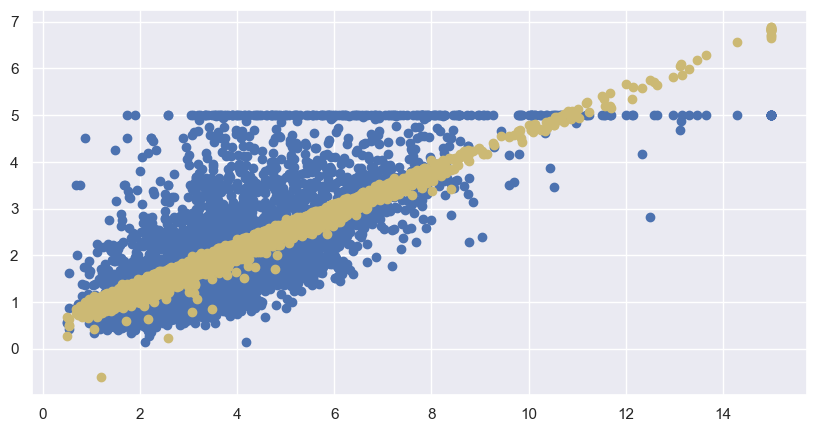

In [39]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, model.predict(X_train), color='blue')
plt.show()         

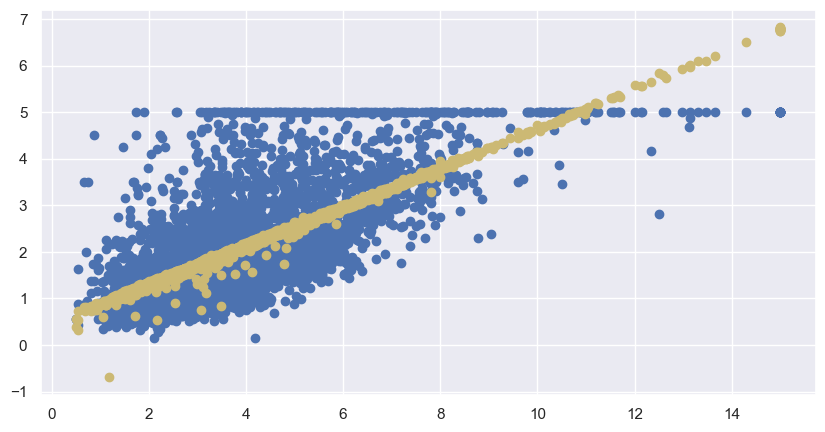

In [55]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, model.predict(X_train), color='blue')
plt.show()         

#### LinearRegression으로 예측하기 (예측값에 제약조건 O)

In [94]:
# 모델을 사용하여 예측값을 계산
constraint_values = model.predict(X_test)

# 각 예측값에 대해 조건을 적용하여 제약을 걸기
for i in range(len(constraint_values)):
    if constraint_values[i] > 5:
        constraint_values[i] = 5.00001  # 예측값이 5를 넘으면 5로 조정

# 제약이 걸린 예측값을 출력
constraint_values

array([2.45446335, 2.00069131, 2.28848164, ..., 0.53158541, 2.64046807,
       2.36235544])

In [95]:
mse = mean_squared_error(constraint_values, y_test)
print('평균제곱오차', mse)

평균제곱오차 0.5109046838045059


In [16]:
rmse = np.sqrt(mse)
print('평균제곱근오차', rmse)

평균제곱근오차 0.714775967562219


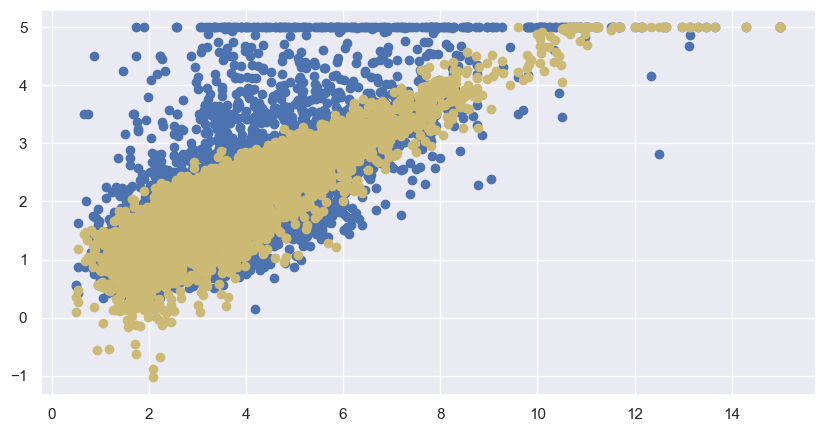

In [96]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], constraint_values, c='y', label='ly_preds')
#plt.plot(X_train, model.predict(X_train), color='blue')
plt.show()         

In [10]:
'''
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 주택 1가구당 평균 방의 수 |
| AveBedrms | 주택 1가구당 평균 침실의 수 |
| Population | 인구 |
| AveOccup |  average house occupancy 평균 주택점유율 |
| Latitude | 위도 |
| Longitude | 경도 |
'''

'\n| MedInc | 블록의 중간 소득 |\n| HouseAge | 블록의 중간 주택 연도 |\n| AveRooms | 주택 1가구당 평균 방의 수 |\n| AveBedrms | 주택 1가구당 평균 침실의 수 |\n| Population | 인구 |\n| AveOccup |  average house occupancy 평균 주택점유율 |\n| Latitude | 위도 |\n| Longitude | 경도 |\n'

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Project/Anaconda/boston.csv", index_col=0)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


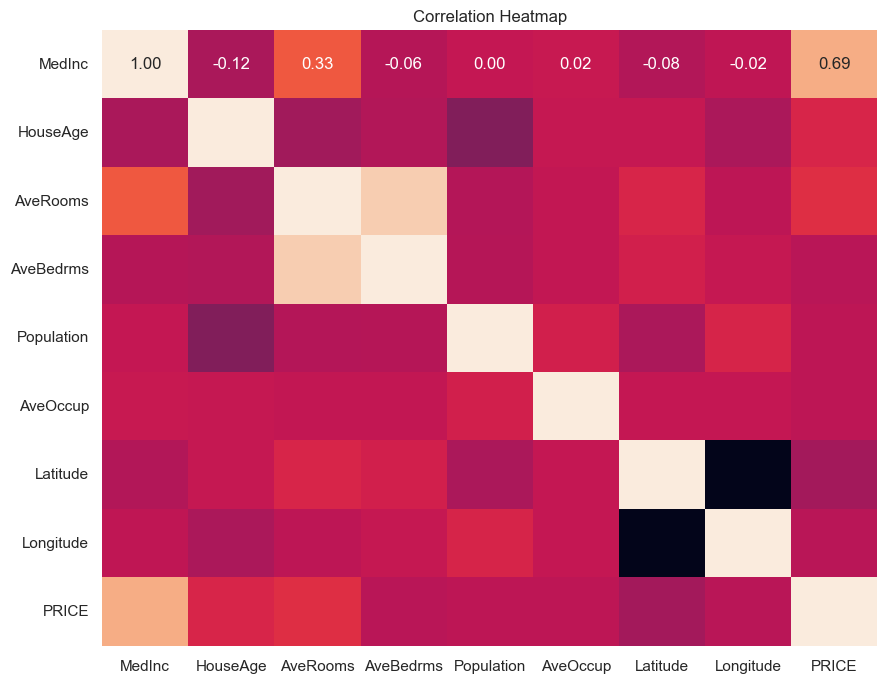

In [42]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cbar=False, fmt=".2f")  # 숫자 크기를 조정
plt.title('Correlation Heatmap')
plt.show()

# PRICE와 높은 건  MedInc

In [43]:
X = df.drop(['HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Longitude'], axis=1)

X

,MedInc,AveBedrms,Latitude,PRICE
0,8.3252,1.023810,37.88,4.526
1,8.3014,0.971880,37.86,3.585
2,7.2574,1.073446,37.85,3.521
3,5.6431,1.073059,37.85,3.413
4,3.8462,1.081081,37.85,3.422
...,...,...,...,...
20635,1.5603,1.133333,39.48,0.781
20636,2.5568,1.315789,39.49,0.771
20637,1.7000,1.120092,39.43,0.923
20638,1.8672,1.171920,39.43,0.847


In [48]:
y = df['AveRooms']
y

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: AveRooms, Length: 20640, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.13,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17956, 4) (17956,)
(2684, 4) (2684,)


In [60]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', rmse)

평균제곱근오차 0.9923123683441293


In [61]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', rmse)

평균제곱근오차 0.9822062135209185


#### AveRooms 예측 후 PRICE 값과 대조해보기

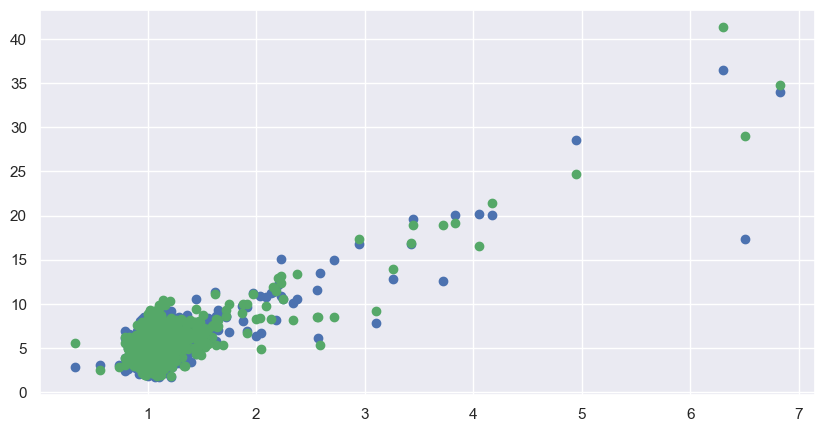

In [64]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['AveBedrms'], y_test, label='y_test')
plt.scatter(X_test['AveBedrms'], dy_preds, c='g', label='dy_preds')
plt.show()         

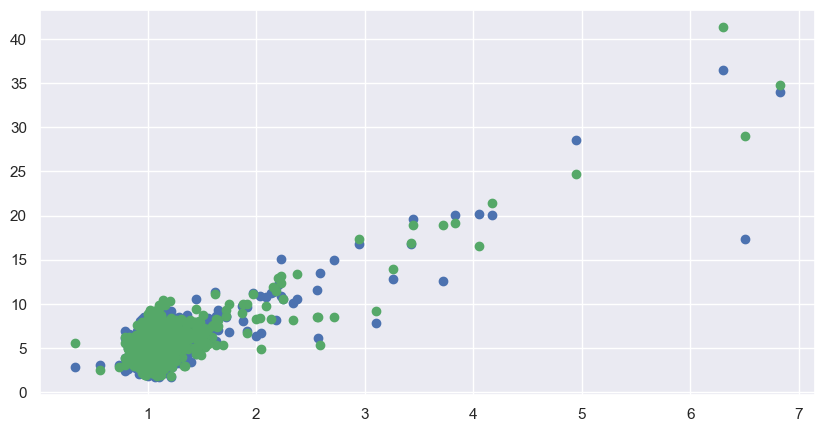

In [66]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['AveBedrms'], y_test, label='y_test')
plt.scatter(X_test['AveBedrms'], dy_preds, c='g', label='dy_preds')
plt.show()         

In [67]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', rmse)

평균제곱근오차 0.7519306123482715


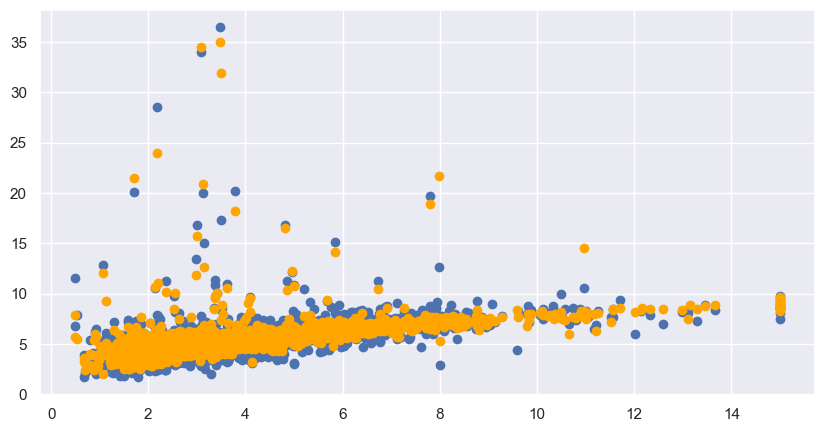

In [68]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ry_preds, c='orange', label='ry_preds')

plt.show()         

In [69]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', rmse)

평균제곱근오차 0.850138550456925


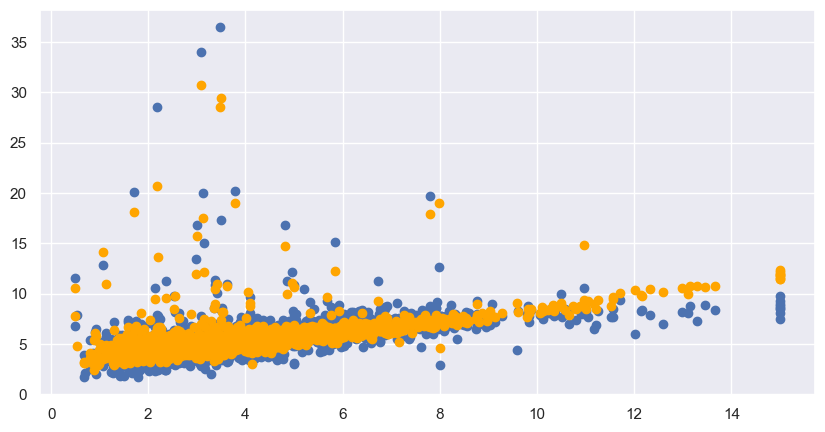

In [70]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ry_preds, c='orange', label='ry_preds')

plt.show()    